In [1]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
import collections

# Load and visualize an example graph

We will use Zachary's Karate Club, a social network showing the interactions between members outside of the club.

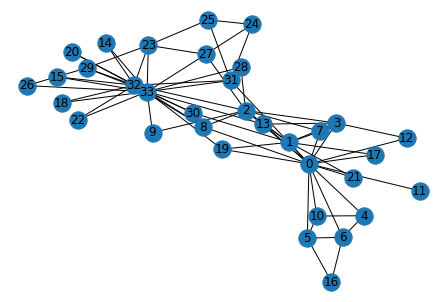

In [2]:
# Load the graph
G_karate = nx.karate_club_graph()
# Define position of each node
pos = nx.spring_layout(G_karate)
# Plot the graph
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

# Question: What kind of graph is G_karate?

# General info from a graph

In [3]:
print(nx.info(G_karate))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


# Degree

In [4]:
# The nx.degree function outputs the degree of each node in the network
nx.degree(G_karate)

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [5]:
# Through some manipulation, you can rank the nodes by degree in a list of tuples
degree_count = sorted(G_karate.degree, key=lambda x: x[1], reverse=True)
# Prepare two tuples that you can plot against each other
node, degree = zip(*degree_count)
print(node)
print(degree)

(33, 0, 32, 2, 1, 3, 31, 8, 13, 23, 5, 6, 7, 27, 29, 30, 4, 10, 19, 24, 25, 28, 9, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26, 11)
(17, 16, 12, 10, 9, 6, 6, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1)


<BarContainer object of 34 artists>

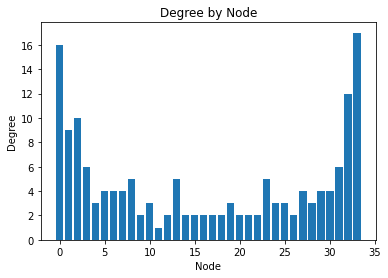

In [6]:
# Plot the degree of each node
ax = plt.subplot(111)
ax.set_title('Degree by Node')
ax.set_xlabel('Node')
ax.set_ylabel('Degree')
ax.bar(node,degree)

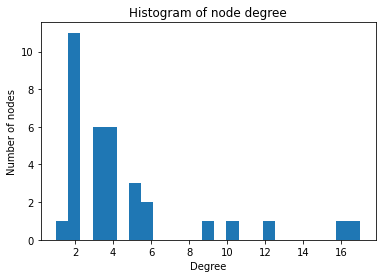

In [7]:
plt.hist(degree,bins=25)
plt.title('Histogram of node degree')
plt.ylabel('Number of nodes')
plt.xlabel('Degree')
plt.show()

# Distances

In [8]:
paths=nx.shortest_path(G_karate)
distances=dict(nx.shortest_path_length(G_karate))
print("Shortest path between node 0 and 14:",paths[0][14])
print("Distance between node 0 and 14:",distances[0][14])

Shortest path between node 0 and 14: [0, 2, 32, 14]
Distance between node 0 and 14: 3


<BarContainer object of 34 artists>

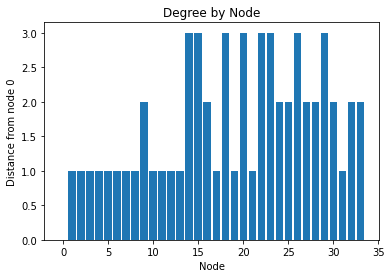

In [9]:
#Plot the distance from node 0 to other nodes
nodes=list(distances[0].keys())
distances_0=list(distances[0].values())

ax = plt.subplot(111)
ax.set_title('Degree by Node')
ax.set_xlabel('Node')
ax.set_ylabel('Distance from node 0')
ax.bar(nodes,distances_0)

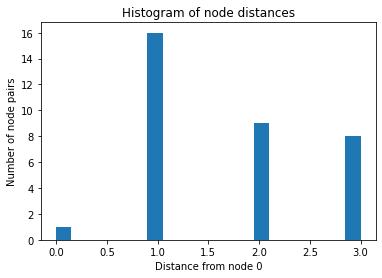

In [10]:
#Plot the distribution of distances from node 0
plt.hist(distances_0,bins=20)
plt.title('Histogram of node distances')
plt.ylabel('Number of node pairs')
plt.xlabel('Distance from node 0')
plt.show()

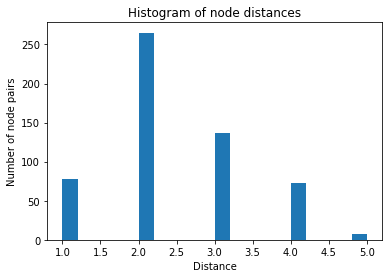

In [11]:
#Plot the distribution of distances from all nodes
distances_vals=[distances[n1][n2] for n1 in G_karate.nodes() for n2 in G_karate.nodes() if n1>n2]
plt.hist(distances_vals,bins=20)
plt.title('Histogram of node distances')
plt.ylabel('Number of node pairs')
plt.xlabel('Distance')
plt.show()

# Betweenness Centrality

In [12]:
# You can generate a dictionary containing the node and the BC
betweenness = nx.betweenness_centrality(G_karate)
# Make values into a list
bc = list(betweenness.values())
print(bc)

[0.43763528138528146, 0.053936688311688304, 0.14365680615680618, 0.011909271284271283, 0.0006313131313131313, 0.02998737373737374, 0.029987373737373736, 0.0, 0.05592682780182781, 0.0008477633477633478, 0.0006313131313131313, 0.0, 0.0, 0.04586339586339586, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03247504810004811, 0.0, 0.0, 0.0, 0.017613636363636363, 0.0022095959595959595, 0.0038404882154882154, 0.0, 0.02233345358345358, 0.0017947330447330447, 0.0029220779220779218, 0.014411976911976909, 0.13827561327561325, 0.145247113997114, 0.30407497594997596]


<BarContainer object of 34 artists>

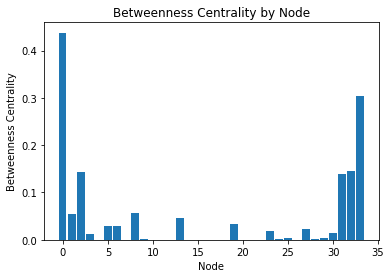

In [13]:
# Plot
ax = plt.subplot(111)
ax.set_title('Betweenness Centrality by Node')
ax.set_xlabel('Node')
ax.set_ylabel('Betweenness Centrality')
# Plot with the nodes in the network as the x axis
ax.bar(G_karate.nodes(), bc)

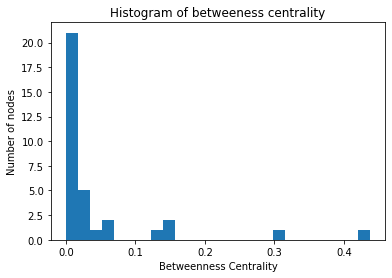

In [14]:
plt.hist(bc,bins=25)
plt.title('Histogram of betweeness centrality')
plt.ylabel('Number of nodes')
plt.xlabel('Betweenness Centrality')
plt.show()

# Degree Centrality

Degree centrality is just the node degree normalized by network size

In [15]:
degree_centrality = nx.degree_centrality(G_karate)
degree_cent = list(degree_centrality.values())

<BarContainer object of 34 artists>

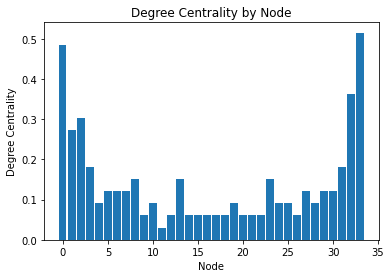

In [16]:
ax = plt.subplot(111)
ax.set_title('Degree Centrality by Node')
ax.set_xlabel('Node')
ax.set_ylabel('Degree Centrality')
ax.bar(G_karate.nodes(), degree_cent)

## Communities using networkx

Using modularity maximization

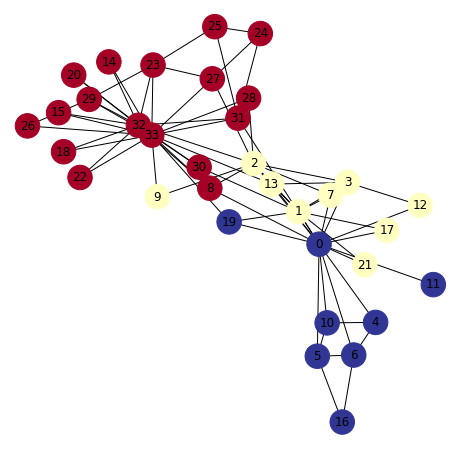

In [17]:
from networkx.algorithms import community as nxcommunity

communities_modularity = list(nxcommunity.greedy_modularity_communities(G_karate))
communities_modularity_dictionary_temp={node:i for i,community in enumerate(communities_modularity) for node in community}
communities_modularity_dictionary={node:communities_modularity_dictionary_temp[node] for node in list(G_karate.nodes())}


communities_dictionary=communities_modularity_dictionary
plt.figure(figsize=(8, 8))
plt.axis('off')

nx.draw_networkx(G_karate, pos, node_size=600,with_labels=True, cmap=plt.cm.RdYlBu, node_color=list(communities_dictionary.values()))
plt.show(G_karate)

Using label propagation

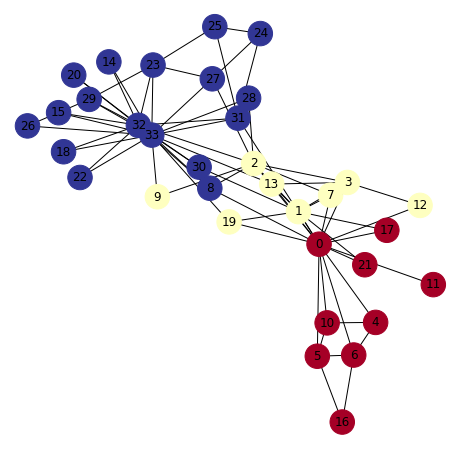

In [18]:
communities_labelprop = list(nxcommunity.label_propagation.asyn_lpa_communities(G_karate,seed=10))
communities_labelprop_dictionary_temp={node:i for i,community in enumerate(communities_labelprop) for node in community}
communities_labelprop_dictionary={node:communities_labelprop_dictionary_temp[node] for node in list(G_karate.nodes())}

plt.figure(figsize=(8, 8))
plt.axis('off')

communities_dictionary=communities_labelprop_dictionary
nx.draw_networkx(G_karate, pos, node_size=600,with_labels=True, cmap=plt.cm.RdYlBu, node_color=list(communities_dictionary.values()))
plt.show(G_karate)


In [19]:
## Communities using networkx

## COVID-Human protein-protein interaction network

We analyzed the Zachary's Karate Club network as an example, but we can also do the same type of analysis in the COVID-Human protein-protein interaction network (Gordon et al. 2020, *Nature*).

First we need to install pygraphviz to allow for better layouts that can help us visualize the network.

In [20]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


You now need to upload the network files from GitHub (https://github.com/jgtz/CdeCMx2020-NetworkBiology). Create a directory "Networks" using the files tab in Google Colab (upper right corner), and upload the files to this folder.


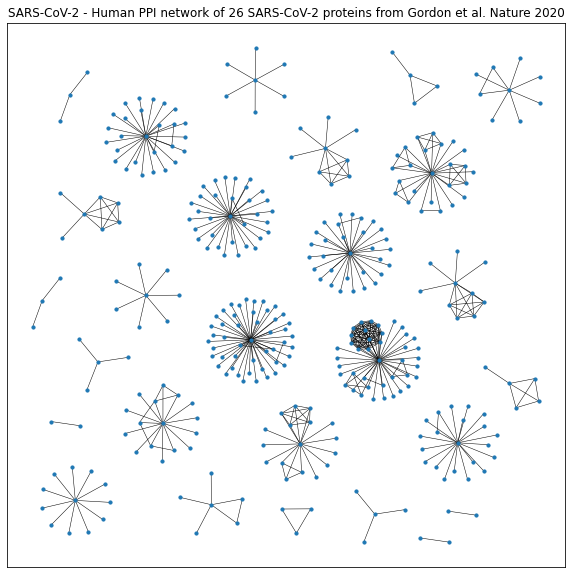

In [21]:
# #Load the graph
G_sarscov2_original = nx.read_graphml("./Networks/HEK293T_SARS-CoV-2.graphml")

# Define position of each node
pos = nx.nx_agraph.graphviz_layout(G_sarscov2_original,prog='neato')
# # Plot the graph
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G_sarscov2_original, pos=pos,node_size=10)
nx.draw_networkx_edges(G_sarscov2_original, pos=pos,width=0.5,arrows=False)
# #Uncomment to label by node number
# nx.draw_networkx_labels(G_sarscov2,pos=pos, font_size=8, alpha=1)
plt.title("SARS-CoV-2 - Human PPI network of 26 SARS-CoV-2 proteins from Gordon et al. Nature 2020")
plt.show()